## CNN(Convolution Neural Network)
- 이미지, 영상 처리에 사용되는 신경망 모델
- DNN의 한 분야
- 텍스트 처리에도 사용되는 모델
- 사용되는 Layer
    * ConvXD : 이미지 형태 그대로 입력 받아 특징을 추출하는 레이어
    * Polling : 특징맵에서 특징을 다시 추출하여 다운샘플링하는 레이어, 크기를 반으로 줄임

In [1]:
from tensorflow.keras.utils import set_random_seed, plot_model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from tensorflow.keras.datasets.fashion_mnist import load_data
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# W,b 고정하도록 seed 설정
set_random_seed(11)

### [1] 데이터 준비 및 로딩

In [3]:
(x_train, y_train), (x_test, y_test) = load_data()

In [4]:
print(f'x_train.shape : {x_train.shape}, y_train.shape : {y_train.shape}')
print(f'x_test.shape : {x_test.shape}, y_train.shape : {y_test.shape}')

x_train.shape : (60000, 28, 28), y_train.shape : (60000,)
x_test.shape : (10000, 28, 28), y_train.shape : (10000,)


## [2] 데이터 전처리 및 학습형태로 변환

In [5]:
# 스케일링 => 픽셀 / 255.0
x_train=x_train/255.0
x_test=x_test/255.0

In [6]:
# Conv 레이어는 이미지의 채널 정보까지 입력
x_train=x_train.reshape(-1, 28, 28, 1)
x_test=x_test.reshape(-1, 28, 28, 1)

In [7]:
print(f'x_train.shape : {x_train.shape}')
print(f'x_test.shape : {x_test.shape}')

x_train.shape : (60000, 28, 28, 1)
x_test.shape : (10000, 28, 28, 1)


In [8]:
# 검증용 데이터 준비
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                 stratify=y_train,
                                                 random_state=11)

In [10]:
# print(f'x_train.shape : {x_train.shape}, x_val.shape : {x_val.shape}, y_train.shape : {y_train.shape}, y_val.shape : {y_val.shape}')

In [11]:
print(f'x_train.shape : {x_train.shape}')
print(f'x_val.shape : {x_val.shape}')
print(f'y_train.shape : {y_train.shape}')
print(f'y_val.shape : {y_val.shape}')

x_train.shape : (45000, 28, 28, 1)
x_val.shape : (15000, 28, 28, 1)
y_train.shape : (45000,)
y_val.shape : (15000,)


---
## [3] 모델 구성 및 생성
- 입력 형태 : 채널정보까지 포함 3차원 (28, 28, 1)
- 출력 형태 : 0 ~ 9정수 확률값 10개 출력
- 학습 방식 : 분류 - 다중분류
- 전반부
    * 이미지의 특징 추출
        - Conv2D, MaxPoll2D
- 후반부
    * 이미지 데이터 학습
        - Flatten, Dense

---
## [3-1] 모델 구상

In [12]:
model = Sequential()

In [13]:
# 이미지 특징 추출 Layer => 첫번째 입력값 설정
model.add(Conv2D(2, kernel_size=3, padding='same', input_shape=(28,28,1)))

In [14]:
# 이미지 특징 다른 샘플링 Layer => MaxPool2D
model.add(MaxPool2D())

In [15]:
# 1차원으로 데이터 형태 변환 Layer => Flatten
model.add(Flatten())

In [16]:
# 출력층 => Node : 10개(0~9), activation : softmax
model.add(Dense(10, activation='softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 2)         20        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 2)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 392)               0         
                                                                 
 dense (Dense)               (None, 10)                3930      
                                                                 
Total params: 3,950
Trainable params: 3,950
Non-trainable params: 0
_________________________________________________________________


In [18]:
plot_model(model, show_shapes=True, show_dtype=True) # to_file='cnn.png'

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


---
## [3-2] 모델 생성
- compile 메서드
    * loss 손실 함수 => 다중이므로 sparse_categorical_crossentropy
    * optimizer 최적화 방식 => adam
    * metrics 평가항목 => accuracy

In [26]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics='accuracy')

---
## [3-3] 모델 학습
- fit 메서드
    * 학습 데이터, 라벨
    * epochs : 학습횟수
    * batch_size : 학습분량
    * validation_data => (검증데이터, 검증라벨) -> 튜플로 담음, 검증데이터 직접 나눴으면 사용
    * validation_split : 학습데이터의 일부 비율 자동으로? 설정(예 : 0.2)
    * callback
    * verbose : 학습 진행도 화면 출력 여부 설정

In [27]:
result = model.fit(x_train, y_train, epochs=30, batch_size=5,
                validation_data=(x_val,y_val))

Epoch 1/30
9000/9000 [==============================] - 20s 2ms/step - loss: 0.3247 - accuracy: 0.8854 - val_loss: 0.3575 - val_accuracy: 0.8775
Epoch 2/30
9000/9000 [==============================] - 20s 2ms/step - loss: 0.3246 - accuracy: 0.8862 - val_loss: 0.3566 - val_accuracy: 0.8780
Epoch 3/30
9000/9000 [==============================] - 28s 3ms/step - loss: 0.3238 - accuracy: 0.8852 - val_loss: 0.3565 - val_accuracy: 0.8767
Epoch 4/30
9000/9000 [==============================] - 29s 3ms/step - loss: 0.3227 - accuracy: 0.8859 - val_loss: 0.3659 - val_accuracy: 0.8735
Epoch 5/30
9000/9000 [==============================] - 31s 3ms/step - loss: 0.3232 - accuracy: 0.8859 - val_loss: 0.3566 - val_accuracy: 0.8779
Epoch 6/30
9000/9000 [==============================] - 30s 3ms/step - loss: 0.3223 - accuracy: 0.8858 - val_loss: 0.3749 - val_accuracy: 0.8735
Epoch 7/30
9000/9000 [==============================] - 30s 3ms/step - loss: 0.3223 - accuracy: 0.8870 - val_loss: 0.3691 - val_ac

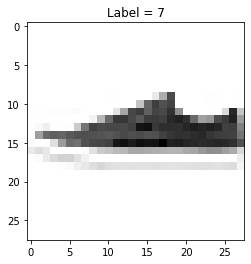

In [28]:
plt.imshow(x_val[0].reshape(28, 28), cmap='gray_r')
plt.title(f'Label = {y_val[0]}')
plt.show()

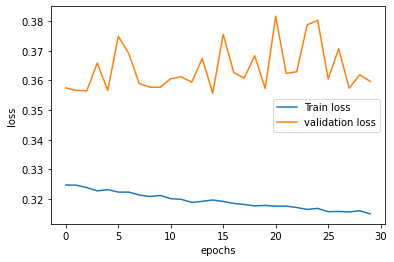

In [29]:
# loss 비교
plt.plot(result.epoch, result.history['loss'],label='Train loss')
plt.plot(result.epoch, result.history['val_loss'],label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

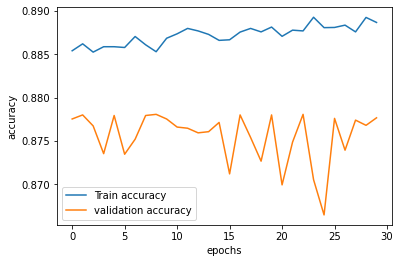

In [30]:
# accuracy 비교
plt.plot(result.epoch, result.history['accuracy'],label='Train accuracy')
plt.plot(result.epoch, result.history['val_accuracy'],label='validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

---
## [4] 테스트 평가
- evaluate 메서드
- 테스트 데이터, 테스트 라벨

In [31]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3811 - accuracy: 0.8690


[0.38113099336624146, 0.8690000176429749]

---
## [5] 테스트
- 새로운 데이터로 하는 것이 좋음

In [32]:
predict_y = model.predict(x_test[0].reshape(-1, 28, 28, 1))

1/1 [==============================] - 0s 282ms/step


In [33]:
predict_y.round(2), predict_y.shape

(array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.99]],
       dtype=float32),
 (1, 10))

In [34]:
y_test[0]

9